In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)


Text(0.5,1,'LC_57957_Z')

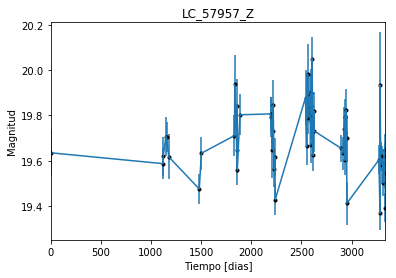

In [2]:
data = np.genfromtxt('LC_57957_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_57957_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

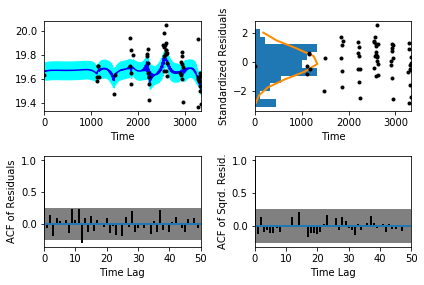

In [5]:
sample.assess_fit()

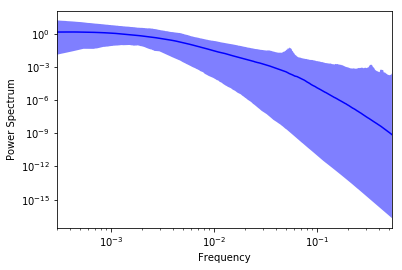

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_57957_Z')

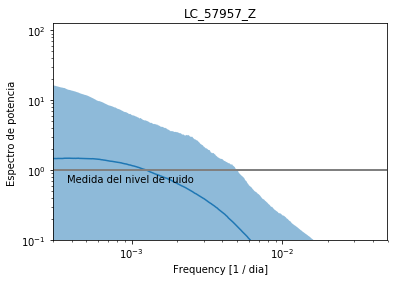

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_57957_Z')

Text(0.5,1,'Prediccion , valor esperado LC_57957_Z')

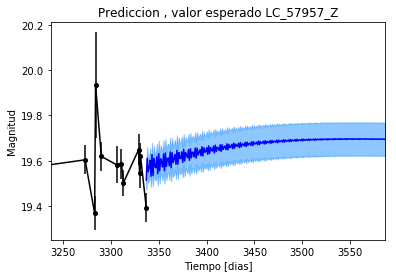

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_57957_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_57957_Z')

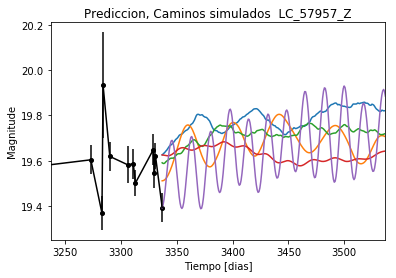

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_57957_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_57957_Z')

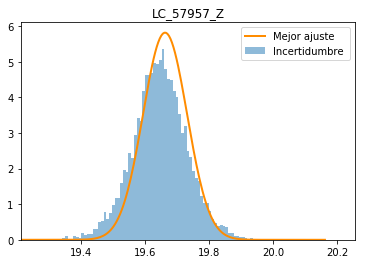

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_57957_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_Z')

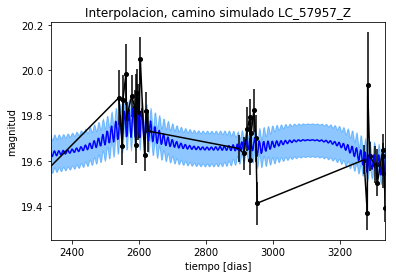

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_Z')

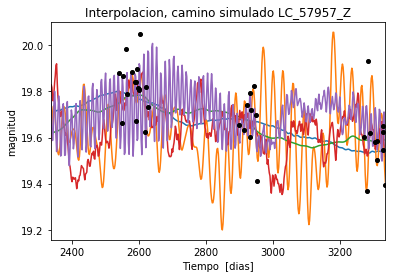

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_Z')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1194.24107833
Median: 0.00682977598953
Standard deviation: 0.204462622388
68% credibility interval: [ 0.00078431  0.1434429 ]
95% credibility interval: [  3.72610592e-04   8.43381996e-01]
99% credibility interval: [  3.13763385e-04   1.01968696e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 583.332637802
Median: 0.00338776605548
Standard deviation: 0.114126055258
68% credibility interval: [ 0.00067617  0.0396848 ]
95% credibility interval: [  3.46548873e-04   3.77649816e-01]
99% credibility interval: [  3.09795789e-04   8.66524999e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 570.011445718
Median: 0.0583337386306

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 709.462665884
Median: 62.7696588985
Standard deviation: 1.73378524937
68% credibility interval: [ 60.98452007  64.00031961]
95% credibility interval: [ 58.61636923  65.91515208]
99% credibility interval: [ 56.73845255  66.73240479]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 512.387604347
Median: 1.01591047043
Standard deviation: 2.58853429156
68% credibility interval: [ 0.10026589  4.72478067]
95% credibility interval: [ 0.02009777  9.06886958]
99% credibility interval: [  1.17734414e-02   1.27102034e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 865.766280866
Median: 1.23866803462
Standard deviation: 11.9323278257
68% credibility interval: [  0.06520281  13.99648107]
95% credibility interval: [  3.1

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 409.87742227
Median: 3.48145965593e-43
Standard deviation: 6.18049004146e+50
68% credibility interval: [  1.21800749e-83   1.62396931e+05]
95% credibility interval: [  2.75212111e-111   4.10264633e+033]
99% credibility interval: [  6.19430477e-118   4.27113550e+049]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3074.98907943
Median: 19.6554534039
Standard deviation: 0.045802883792
68% credibility interval: [ 19.61487315  19.69227294]
95% credibility interval: [ 19.55451544  19.73449499]
99% credibility interval: [ 19.49309979  19.78479424]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1070.74197547
Median: 0.0665470580801
Standard deviation: 0.27589595502
68% credibility interval: [ 0.          0.53677824]
95% credibility interval: [ 0.          0.94499431]
99% credibility interval: [ 0.          1.04245578]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1070.74197547
Median: 0.0665470580801
Standard deviation: 0.27589595502
68% credibility interval: [ 0.          0.53677824]
95% credibility interval: [ 0.          0.94499431]
99% credibility interval: [ 0.          1.04245578]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 16036.4728585
Median: 0.0
Standard deviation: 0.00791827142816
68% credi

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 709.462665884
Median: 62.7696588985
Standard deviation: 1.73378524937
68% credibility interval: [ 60.98452007  64.00031961]
95% credibility interval: [ 58.61636923  65.91515208]
99% credibility interval: [ 56.73845255  66.73240479]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3157.72553003
Median: 0.0108646186755
Standard deviation: 0.0112549502053
68% credibility interval: [ 0.0058387   0.02024675]
95% credibility interval: [ 0.00295103  0.04106709]
99% credibility interval: [ 0.00224335  0.06876829]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 747.756145407
Median: 1.3213202511
Standard deviation: 0.228915119693
68% credibility interval: [ 1.09923975  1.56904076]
95% credibility interval: [ 0.91552488  1.81690423]
99% credibility interval: [ 0.83086874  1.93956233]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 561.408141972
Median: 0.000820025213873
Standard deviation: 0.493655480315
68% credibility interval: [  1.71316594e-08   9.81362360e-02]
95% credibility interval: [  1.49044348e-36   1.23659761e+00]
99% credibility interval: [  1.33373436e-51   3.10671335e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1194.24107833
Median: (-0.0429127481487-0.465777010592j)
Standard deviation: 2.15764566936
68% credibility interval: [-0.90127834+0.j         -0.00492800-0.33027671j]
95% credibility interval: [ -5.29912536e+00+0.j         -2.34118139e-03-0.0166715j]
99% credibility interval: [ -6.40688210e+00+0.j          -1.97143349e-03-0.32837443j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 583.332637802
Median: (-0.021285961904+0j)
Standard deviation: 1.87596316207
68% credibility interval: [-0.24934696+0.33439328j -0.00424850+4.20546464j]
95% credibility interval: [ -2.37284378e+00+4.47850776j  -2.17743079e-03+0.45591695j]
99% credibility interval: [ -5.44453714e+00+4.91921376j  -1.94650435e-03+0.j        ]
Posterior summary 